In [4]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, norm

In [5]:
def display(k, size: int, type_dist):
  if type(k) == tuple:
    a = type_dist.rvs(k[0], np.sqrt(k[1]), size = size, random_state = np.random)
  else:
    a = type_dist.rvs(size = size, df = k, random_state = np.random)
  x = np.sort(a)
  y = np.arange(len(x))/float(len(x))
  if type(k) == tuple:
    F_x = type_dist.cdf(x, k[0], np.sqrt(k[1]))
  else:
    F_x = type_dist.cdf(x, df = k)
  plt.plot(x, F_x)
  plt.plot(x, y)
  plt.xlabel(f"Distribution {type_dist.name} and size:{size}")
  plt.show()

  if type(k) == tuple:
    f_x = type_dist.pdf(x, k[0], np.sqrt(k[1]))
  else:
    f_x = type_dist.pdf(x, df = k)
  plt.hist(x, density = True)
  plt.xlabel(f"Distribution {type_dist.name} and size:{size}")
  plt.plot(x, f_x)
  plt.show()

# Задание 2

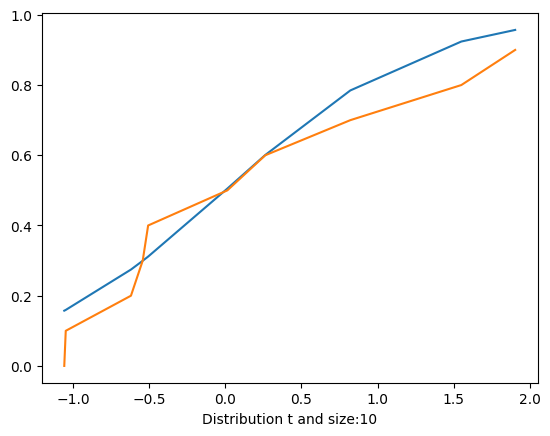

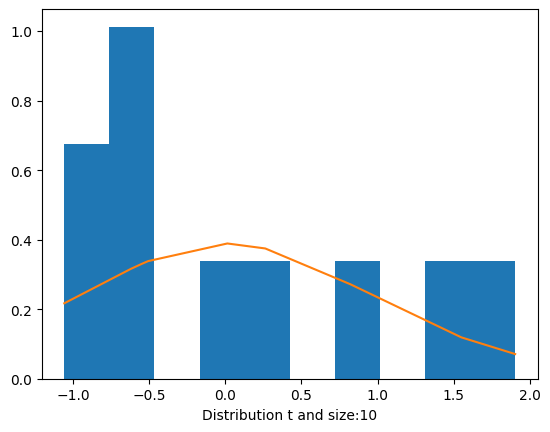

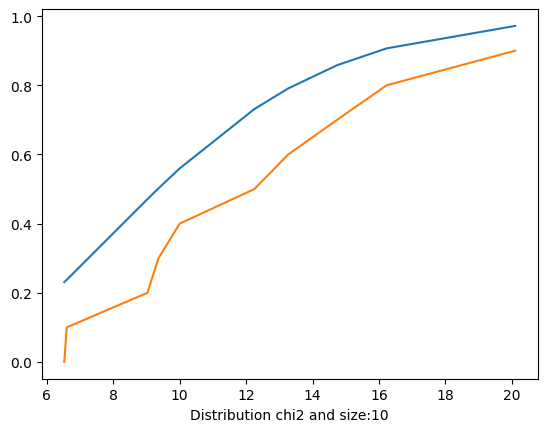

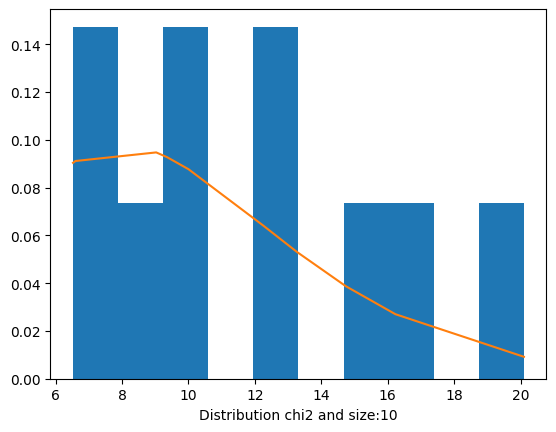

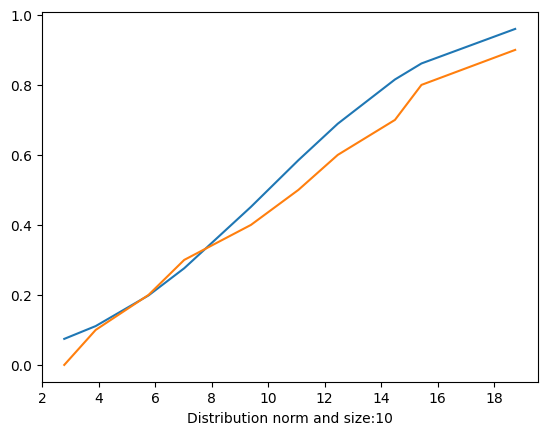

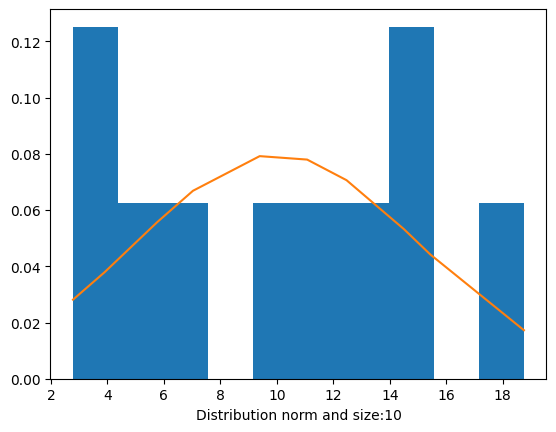

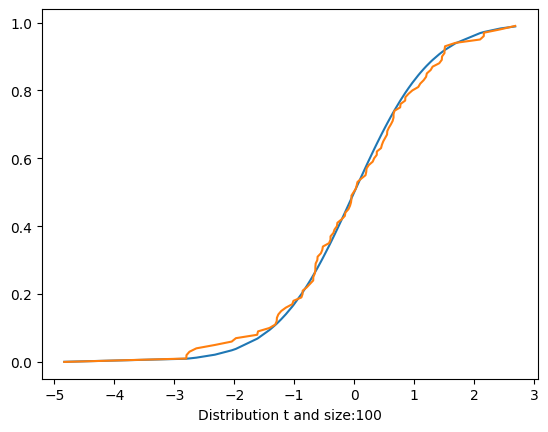

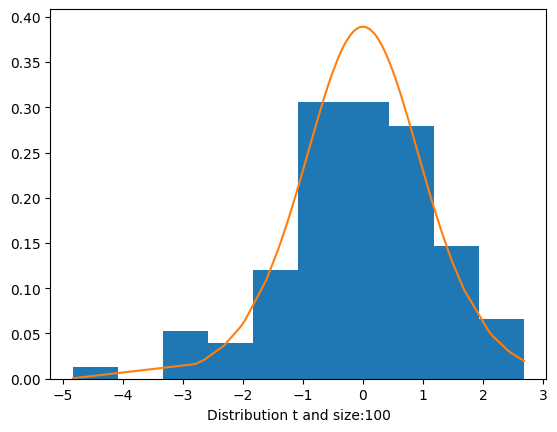

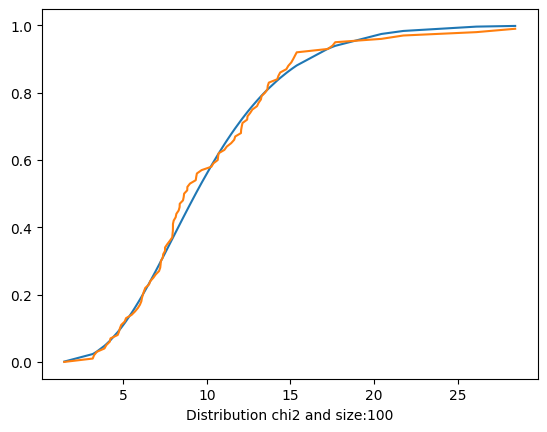

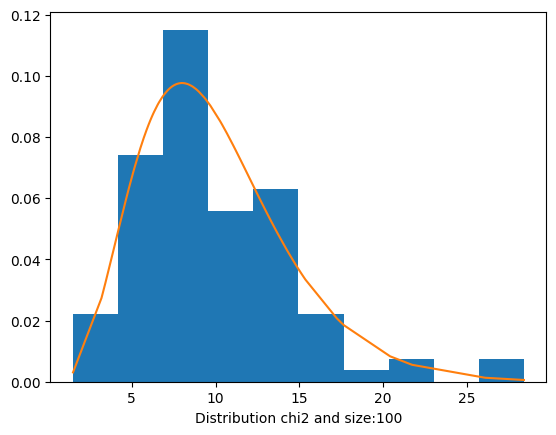

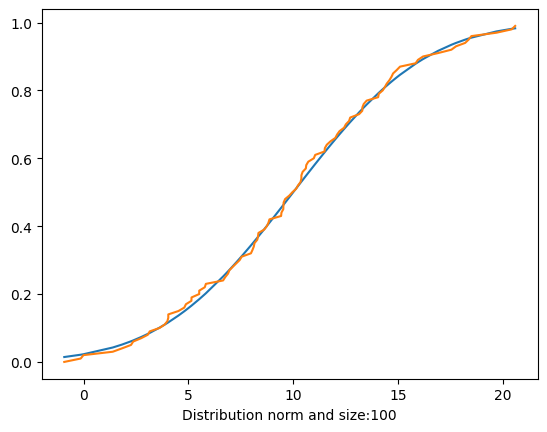

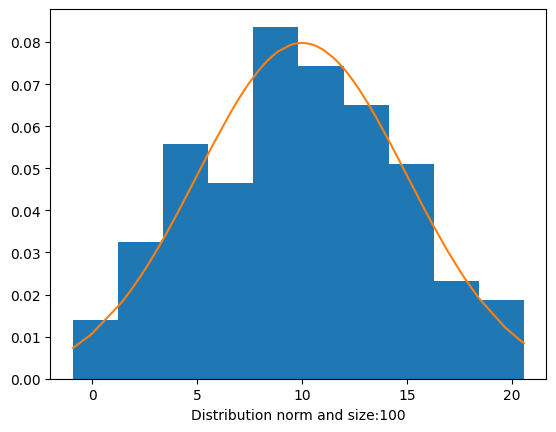

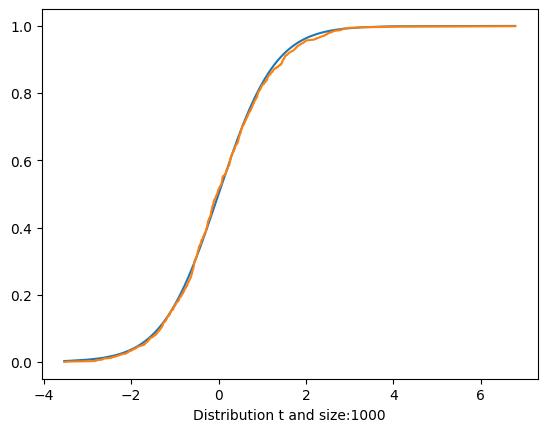

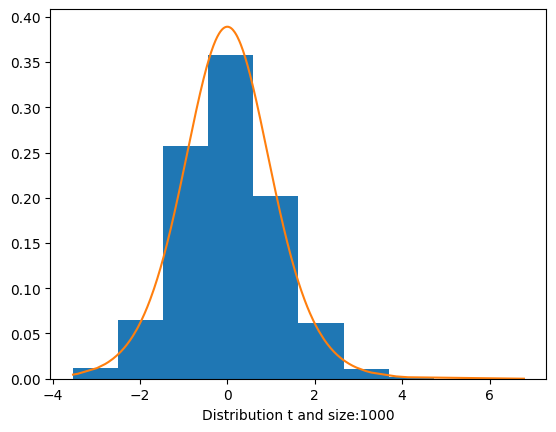

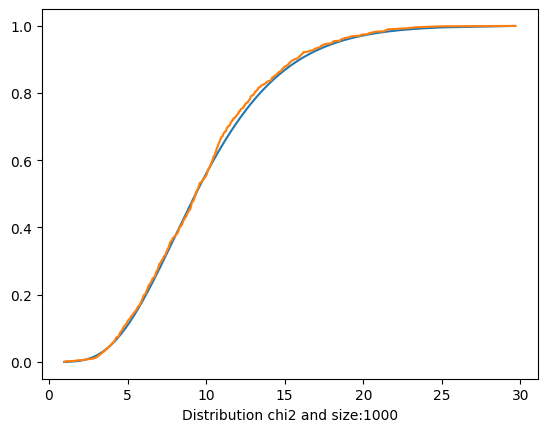

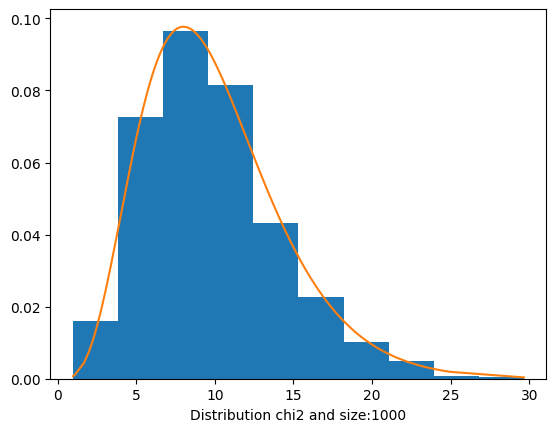

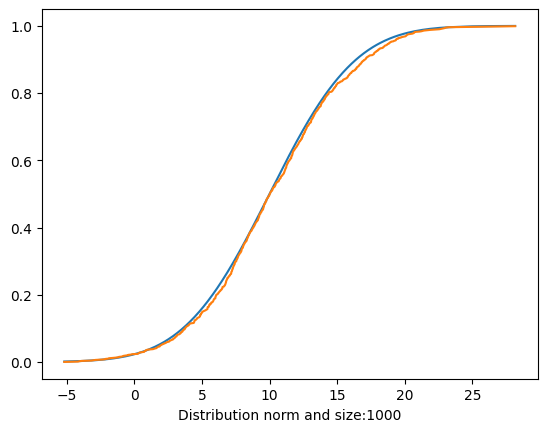

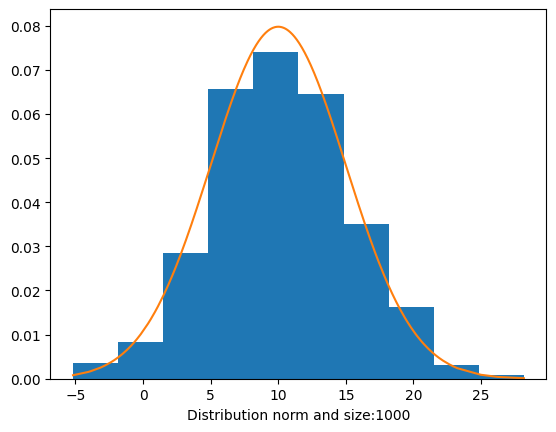

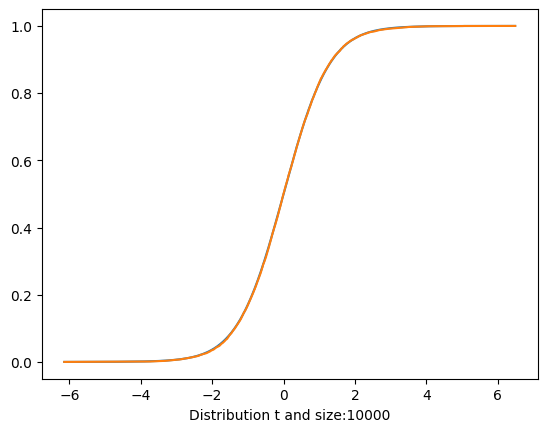

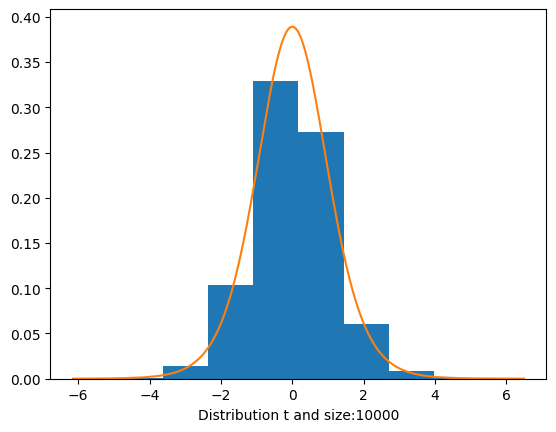

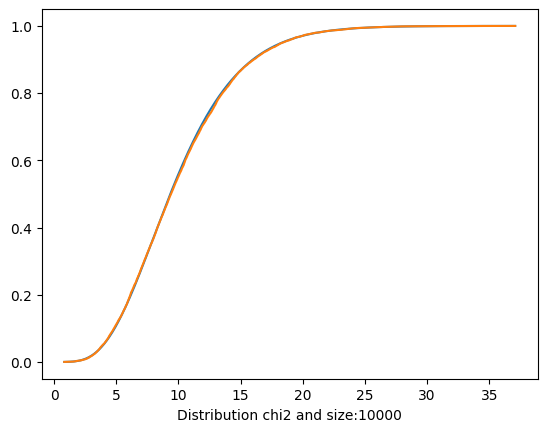

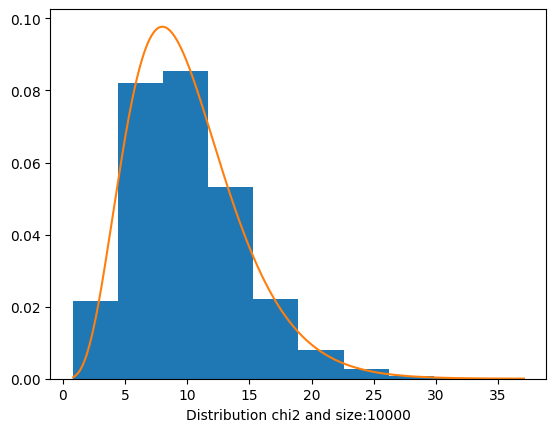

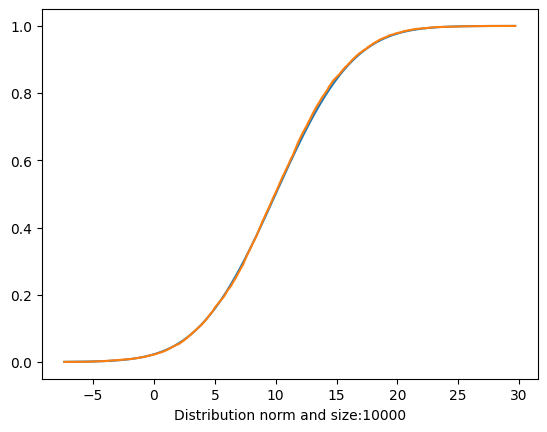

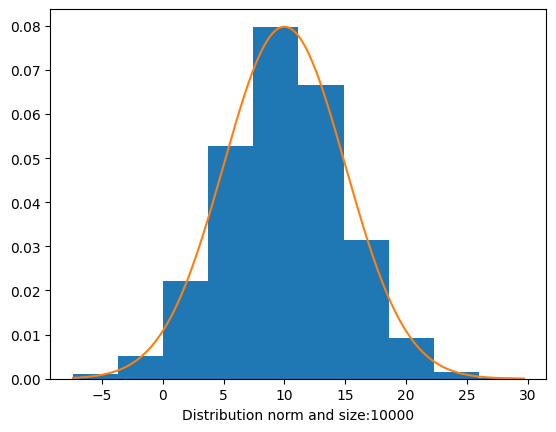

In [6]:
itter = (10, 100, 1000, 10000)
type_dist = (t, chi2, norm)
params = (10, 10, (10, 25))
for index in itter:
  for typing, param in zip(type_dist, params):
    display(param, index, typing)

# Задание 3

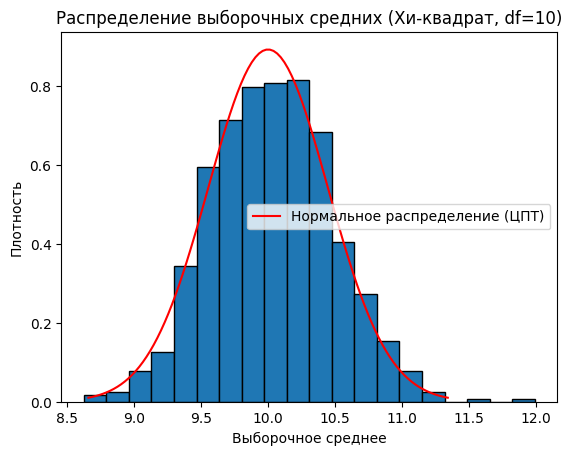

In [7]:
# Параметры
df = 10  # Степени свободы Хи-квадрат
num_samples = 1000  # Количество выборок
sample_size = 100   # Объем каждой выборки

# Генерация выборок
samples = np.random.chisquare(df, size=(num_samples, sample_size))

# Вычисление выборочных средних
sample_means = np.mean(samples, axis=1)

# Визуализация распределения выборочных средних
plt.hist(sample_means, bins=20, density=True, edgecolor='black')
plt.title("Распределение выборочных средних (Хи-квадрат, df=10)")
plt.xlabel("Выборочное среднее")
plt.ylabel("Плотность")

# ЦПТ: Аппроксимация нормальным распределением
mu_x_bar = df  # Мат. ожидание выборочного среднего (равно мат. ожиданию Хи-квадрат)
sigma_x_bar = np.sqrt(2 * df / sample_size)  # Стандартное отклонение выборочного среднего

x = np.linspace(mu_x_bar - 3 * sigma_x_bar, mu_x_bar + 3 * sigma_x_bar, 100)
y = norm.pdf(x, mu_x_bar, sigma_x_bar)  # Значения плотности нормального распределения

plt.plot(x, y, 'r-', label='Нормальное распределение (ЦПТ)')
plt.legend()

plt.show()

# Задание 4

In [8]:
def chi_square_cdf(x, df):
    return 1 - np.exp(-x/2)

n = 5  # число степеней свободы
N = 1000  # количество выборок
sample_values = np.random.chisquare(df=n, size=(N,))

# Вычисление значений выборочной функции распределения в точке 5
sample_cdf_values = chi_square_cdf(sample_values, n)

# Оценка математического ожидания и дисперсии выборочной функции распределения в точке 5
mean_estimate = np.mean(sample_cdf_values)
variance_estimate = np.var(sample_cdf_values)

# Теоретические значения матожидания и дисперсии
mean_theoretical = n
variance_theoretical = 2 * n

print("Полученная оценка матожидания выборочной ФР в точке 5:", mean_estimate)
print("Полученная оценка дисперсии выборочной ФР в точке 5:", variance_estimate)
print("Теоретическое матожидание в точке 5 для Хи-2 распределения с", n, "степенями свободы:", mean_theoretical)
print("Теоретическая дисперсия в точке 5 для Хи-2 распределения с", n, "степенями свободы:", variance_theoretical)

Полученная оценка матожидания выборочной ФР в точке 5: 0.8283414767692991
Полученная оценка дисперсии выборочной ФР в точке 5: 0.033160571192179446
Теоретическое матожидание в точке 5 для Хи-2 распределения с 5 степенями свободы: 5
Теоретическая дисперсия в точке 5 для Хи-2 распределения с 5 степенями свободы: 10
